In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("EPL_20_21.csv")
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [18]:
df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [17]:
df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [86]:
pos = df['Position'].unique()
pos

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

<AxesSubplot:>

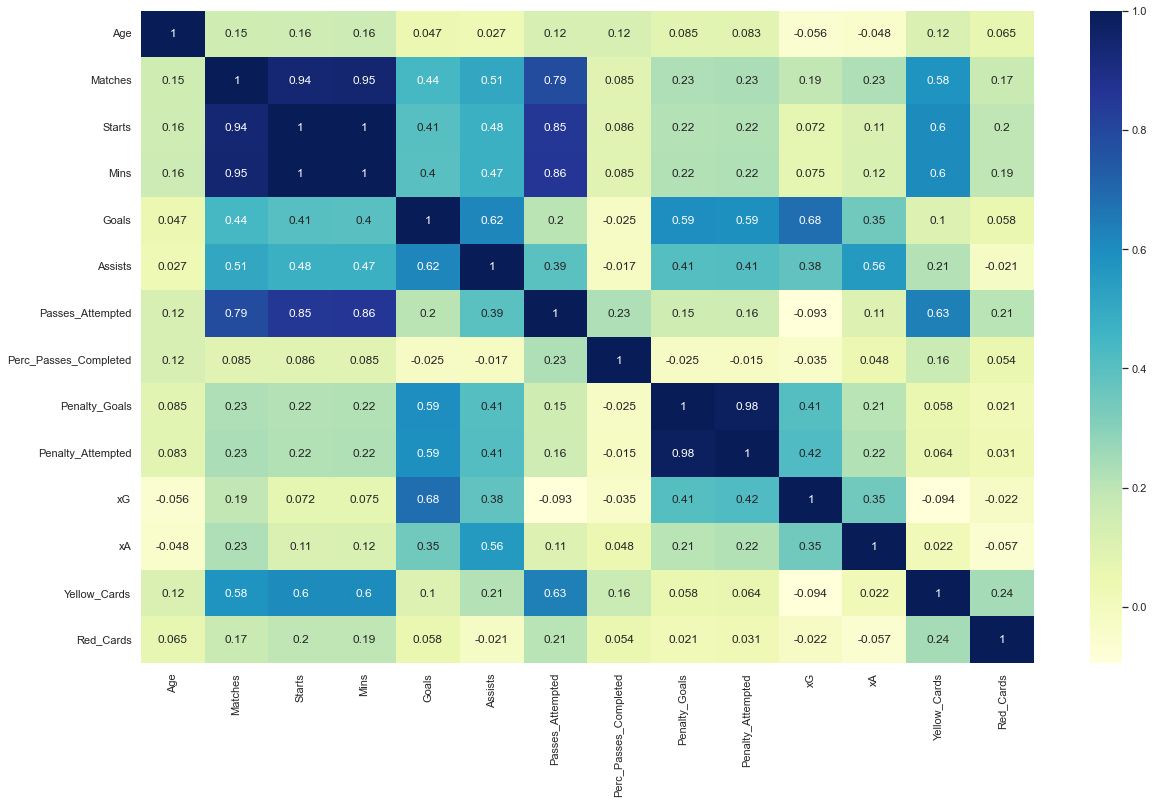

In [24]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")


In [5]:
player_count = df.groupby("Club")
player_count["Name"].count()

Club
Arsenal                    29
Aston Villa                24
Brighton                   27
Burnley                    25
Chelsea                    27
Crystal Palace             24
Everton                    29
Fulham                     28
Leeds United               23
Leicester City             27
Liverpool FC               28
Manchester City            24
Manchester United          29
Newcastle United           27
Sheffield United           27
Southampton                29
Tottenham Hotspur          24
West Bromwich Albion       30
West Ham United            24
Wolverhampton Wanderers    27
Name: Name, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Club'>

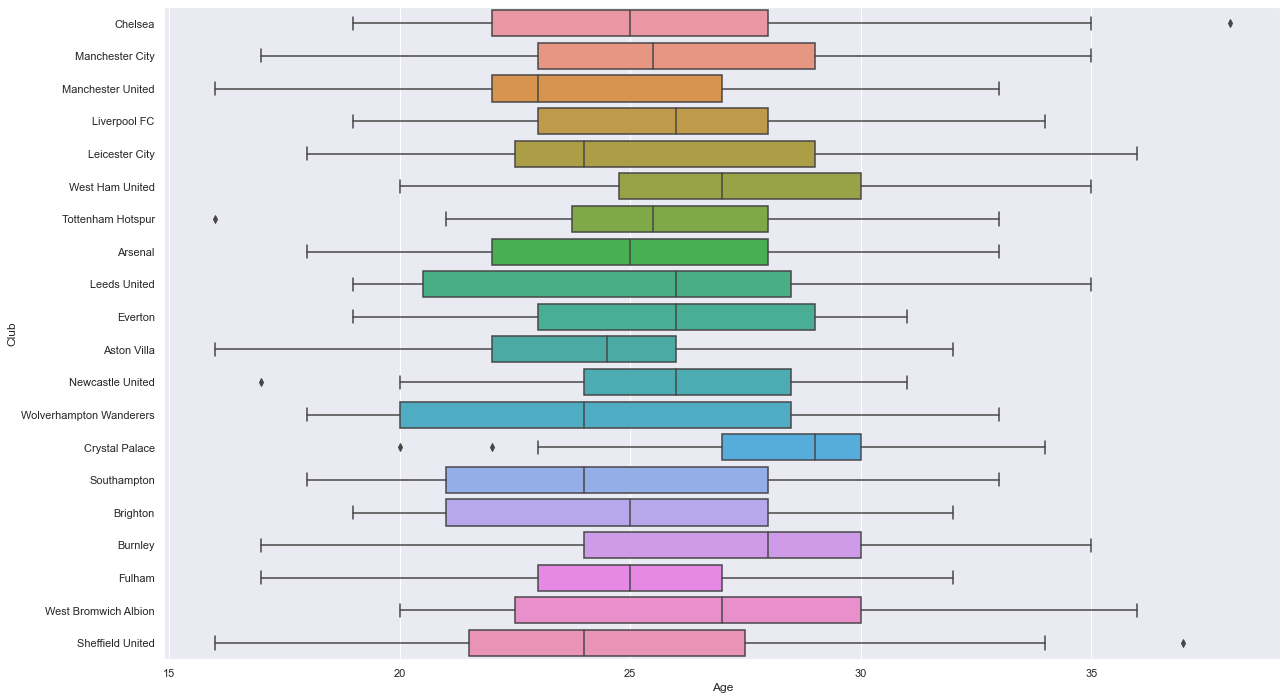

In [13]:
plt.figure(figsize=(20,12))
sns.set_theme()
sns.boxplot(x='Age',y='Club', data=df)

Text(0.5, 1.0, 'Most Goals Scored')

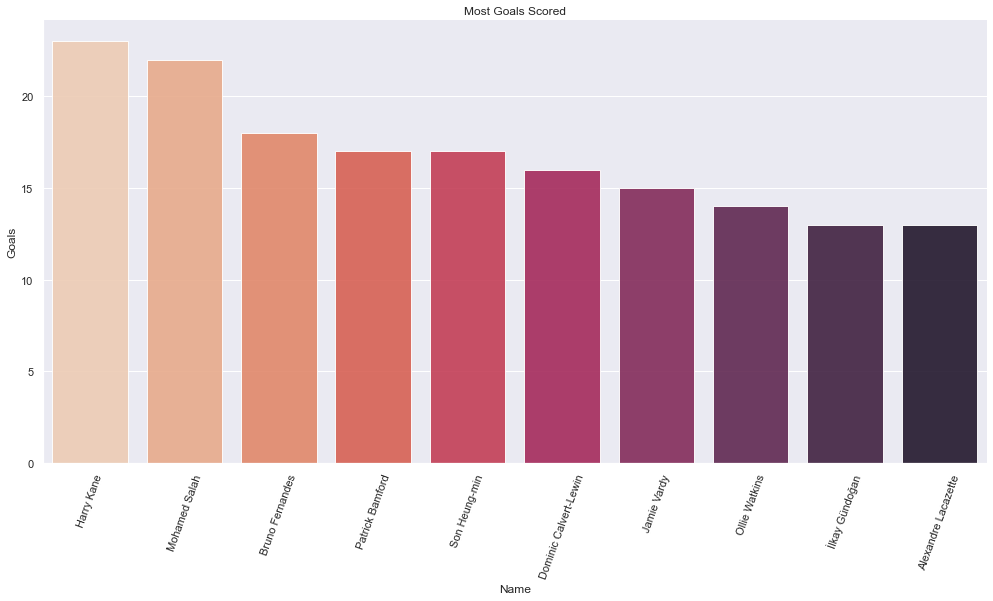

In [47]:
score_ = df.sort_values(by=["Goals"], ascending=False)[:10]

sns.catplot(x="Name", y="Goals", data=score_, kind="bar", height=7, aspect=2,palette="rocket_r", alpha=0.9)
plt.xticks(rotation=70)
plt.title('Most Goals Scored')

Text(0.5, 1.0, 'Most Assist')

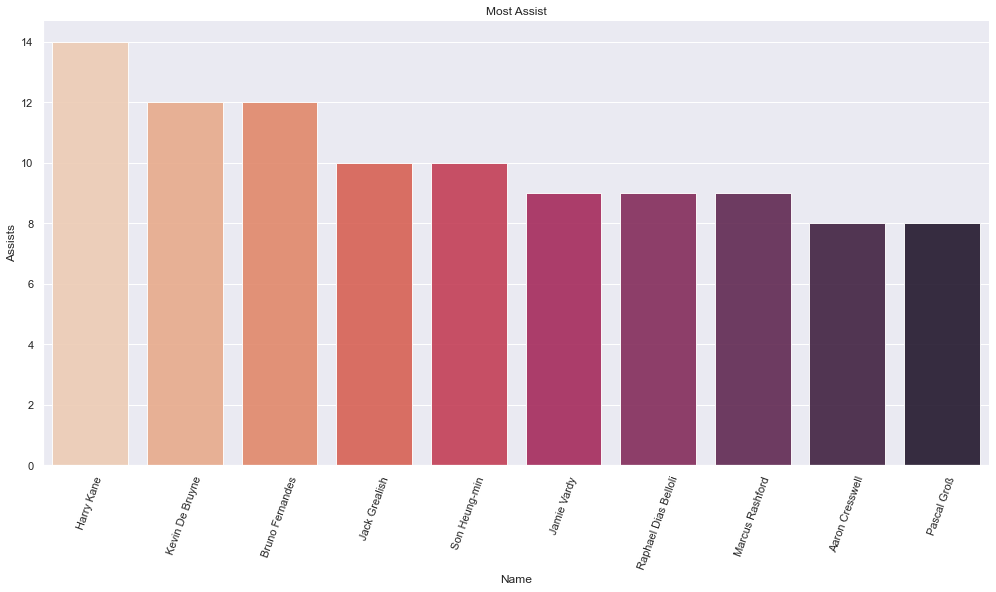

In [50]:
assist_ = df.sort_values(by=["Assists"], ascending=False)[:10]

sns.catplot(x="Name", y="Assists", data=assist_, kind="bar", height=7, aspect=2,palette="rocket_r", alpha=0.9)
plt.xticks(rotation=70)
plt.title('Most Assist')

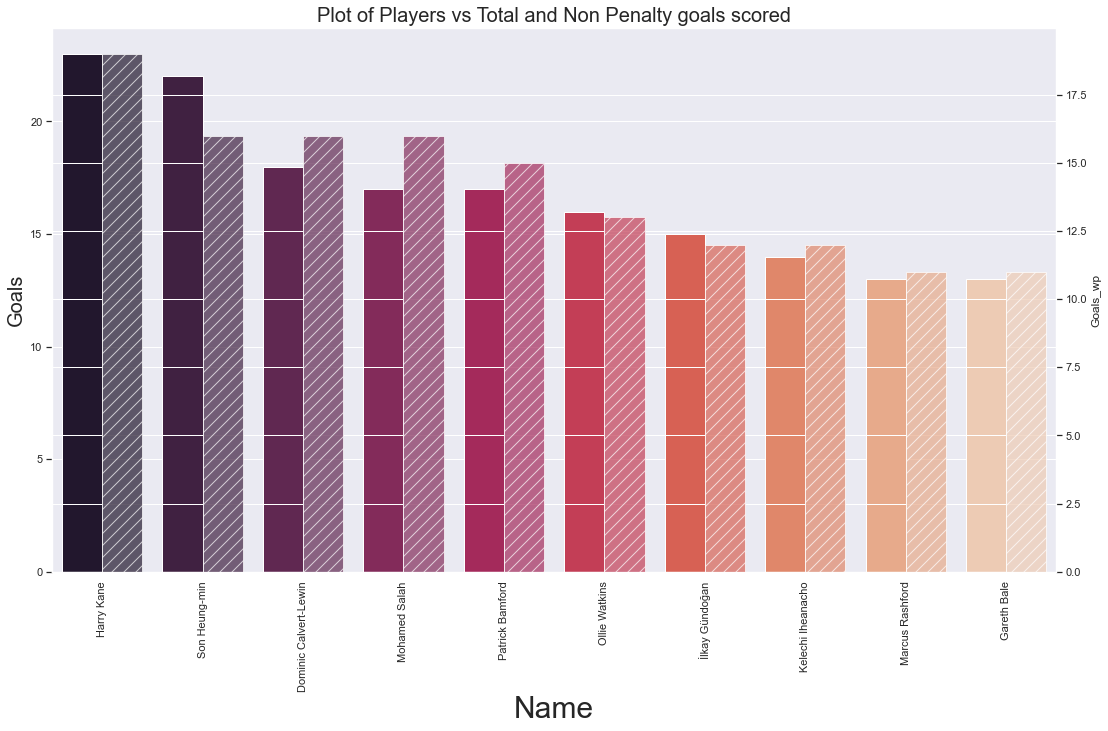

In [59]:
plt.figure(figsize=(18,10))
ax = sns.barplot(x='Name',y='Goals',data=score_,palette='rocket')
df['Goals_wp'] = df['Goals'] - df['Penalty_Goals']
plt.xticks(rotation=90)
plt.title('Plot of Players vs Total and Non Penalty goals scored',fontsize = 20)
width = .5
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width)
    
ax.set_xlabel("Name",fontsize=30)
ax.set_ylabel("Goals",fontsize=20)
    
ax2 = ax.twinx()
ax2 = sns.barplot(x='Name',y='Goals_wp',data=df.sort_values(by="Goals_wp",ascending= False)[:10],palette='rocket',alpha = 0.7,hatch = '//')

for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width))
    bar.set_width(w * width)

In [148]:
teams = df.groupby('Club')
clubs = df['Club'].unique()

In [149]:
def total_cat(col):
    total=[]
    for club in clubs:
        total.append(teams.get_group(club)[col].sum())
    df=pd.DataFrame({'Club':clubs,f'Total {col}':total})
    return df

Text(0.5, 1.0, 'Most Goals')

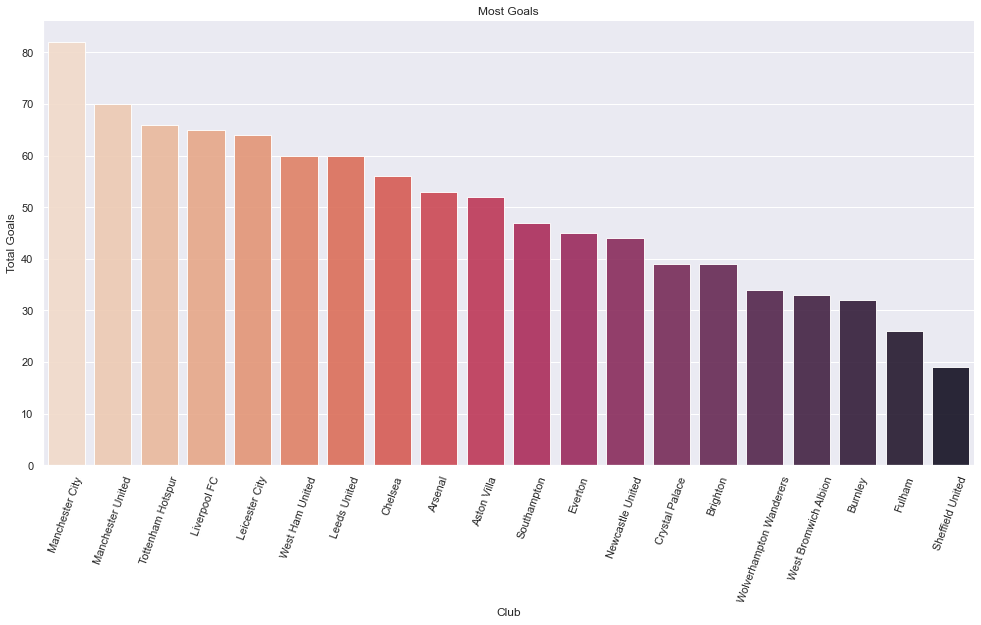

In [150]:
total_goals=total_cat('Goals')
total_goals=total_goals.sort_values(by="Total Goals",ascending=False)

sns.catplot(x="Club", y="Total Goals", data=total_goals, kind="bar", height=7, aspect=2,palette="rocket_r", alpha=0.9)
plt.xticks(rotation=70)
plt.title('Most Goals')

In [63]:
def players_per_club(x):
    data=df[df["Club"]==x]
    df_club=data.sort_values(by=['Goals'],ascending=False)[['Name','Age','Nationality','Goals','Assists','xG','xA']].head(10).style.background_gradient('YlOrRd')
    return df_club
players_per_club('Chelsea')
 

,Name,Age,Nationality,Goals,Assists,xG,xA
7,Jorginho,28,ITA,7,1,0.310000,0.090000
0,Mason Mount,21,ENG,6,5,0.210000,0.240000
2,Timo Werner,24,GER,6,8,0.410000,0.210000
16,Tammy Abraham,22,ENG,6,1,0.560000,0.070000
9,Kurt Zouma,25,FRA,5,0,0.080000,0.000000
19,Olivier Giroud,33,FRA,4,0,0.580000,0.090000
12,Christian Pulisic,21,USA,4,2,0.280000,0.140000
13,Kai Havertz,21,GER,4,3,0.370000,0.090000
3,Ben Chilwell,23,ENG,3,5,0.100000,0.110000
8,Thiago Silva,35,BRA,2,0,0.050000,0.020000


In [64]:
players_per_club('Liverpool FC')


,Name,Age,Nationality,Goals,Assists,xG,xA
81,Mohamed Salah,28,EGY,22,5,0.610000,0.180000
86,Sadio Mané,28,SEN,11,7,0.490000,0.180000
85,Roberto Firmino,28,BRA,9,7,0.400000,0.200000
92,Diogo Jota,23,POR,9,0,0.530000,0.130000
82,Trent Alexander-Arnold,21,ENG,2,7,0.080000,0.240000
83,Georginio Wijnaldum,29,NED,2,0,0.100000,0.050000
80,Andrew Robertson,26,SCO,1,7,0.040000,0.180000
91,Curtis Jones,19,ENG,1,2,0.110000,0.120000
103,Takumi Minamino,25,JPN,1,0,0.200000,0.000000
104,Alex Oxlade-Chamberlain,26,ENG,1,1,0.130000,0.080000


In [72]:
def search_youngplayer_per_club(x):
    data=df[df["Club"]==x]
    df_club=data.sort_values(by=['Mins'],ascending=False)[['Name','Age','Mins','Nationality','Goals','Assists','xG','xA']].head(10).style.background_gradient('YlOrRd')
    return df_club
search_youngplayer_per_club('Arsenal')

,Name,Age,Mins,Nationality,Goals,Assists,xG,xA
183,Bernd Leno,28,3131,GER,0,0,0.000000,0.000000
186,Rob Holding,24,2558,ENG,0,1,0.040000,0.010000
184,Bukayo Saka,18,2553,ENG,5,3,0.240000,0.170000
185,Granit Xhaka,27,2522,SUI,1,2,0.030000,0.060000
187,Pierre-Emerick Aubameyang,31,2332,GAB,10,3,0.410000,0.110000
188,Kieran Tierney,23,2299,SCO,1,3,0.020000,0.160000
189,Héctor Bellerín,25,2089,ESP,1,2,0.040000,0.100000
190,Gabriel Dos Santos,22,1996,BRA,2,0,0.050000,0.000000
191,Alexandre Lacazette,29,1923,FRA,13,2,0.460000,0.130000
197,Nicolas Pépé,25,1616,CIV,10,1,0.390000,0.050000


In [84]:
#CASE STUDY
#LETS SAY WE ARE LOOKING FOR A YOUNG PLAYER WHO HAS GOOD STATS ON PASSING AND xA
def search_player():
    data = df[df['Age'] <25]
    df_club=data.sort_values(by=['Passes_Attempted','xA'],ascending=False)[['Name','Age','Mins','Passes_Attempted','Goals','Assists','xG','xA']].head(20).style.background_gradient('YlOrRd')
    return df_club
search_player()

,Name,Age,Mins,Passes_Attempted,Goals,Assists,xG,xA
82,Trent Alexander-Arnold,21,3031,2941,2,7,0.080000,0.240000
29,Rodri,24,2748,2728,2,2,0.080000,0.060000
159,Pierre Højbjerg,24,3420,2687,2,4,0.030000,0.050000
28,Rúben Dias,23,2843,2671,1,0,0.070000,0.000000
109,Youri Tielemans,23,3357,2559,6,4,0.120000,0.090000
265,Matt Targett,24,3404,2147,0,2,0.010000,0.080000
52,Aaron Wan-Bissaka,22,3060,2065,2,4,0.030000,0.070000
367,Jan Bednarek,24,3100,2005,1,1,0.030000,0.010000
4,Reece James,20,2373,1987,1,2,0.060000,0.120000
318,Rúben Neves,23,2675,1937,5,1,0.170000,0.070000


There is correlation between Passes_Attempted and yellow card.
Lets see which position attempt to pass most and which position gets yellow card most

In [163]:
positions = df['Position'].unique()
position_df = df.groupby('Position')

In [168]:
def total_pos(col):
    total=[]
    for ps in positions:
        total.append(position_df.get_group(ps)[col].sum())
    df=pd.DataFrame({'Position':positions,f'Total {col}':total})
    return df

Text(0.5, 1.0, 'Pass Attempetd by Position')

<Figure size 1368x864 with 0 Axes>

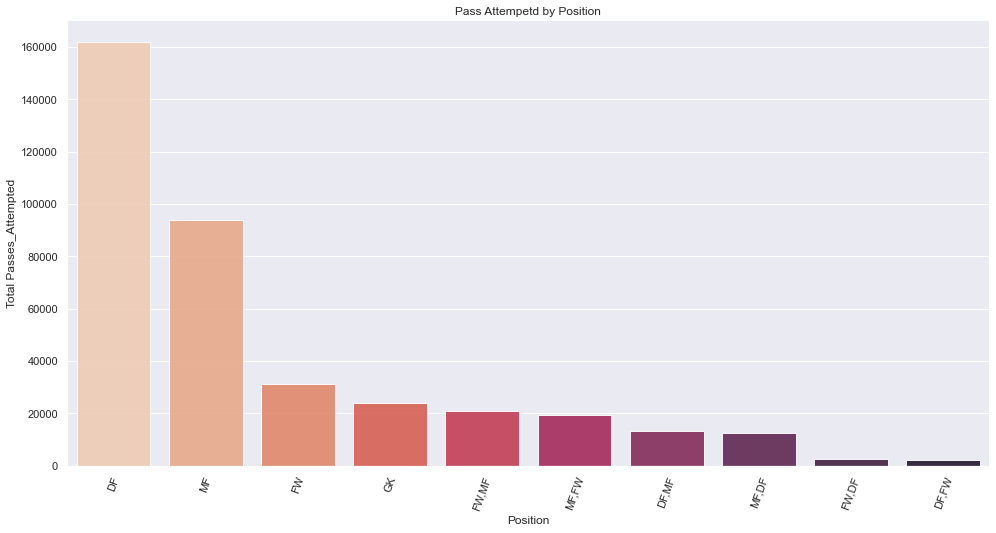

In [176]:
plt.figure(figsize=(19,12))


total_poss=total_pos('Passes_Attempted')
total_poss=total_poss.sort_values(by="Total Passes_Attempted",ascending=False)

sns.catplot(x="Position", y="Total Passes_Attempted", data=total_poss, kind="bar", height=7, aspect=2,palette="rocket_r", alpha=0.9)
plt.xticks(rotation=70)
plt.title('Pass Attempetd by Position')

Text(0.5, 1.0, 'Yellow_Cards by Position')

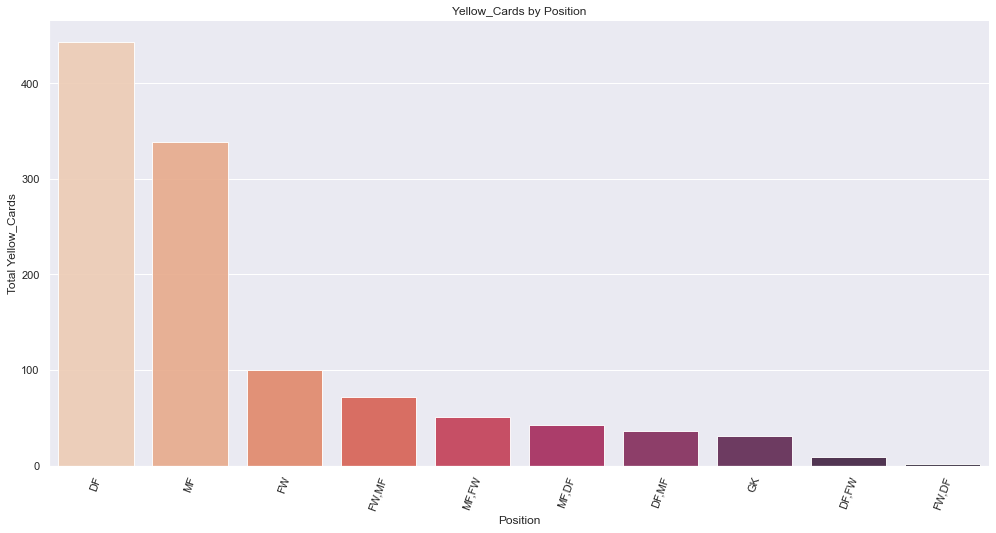

In [177]:
total_poss=total_pos('Yellow_Cards')
total_poss=total_poss.sort_values(by="Total Yellow_Cards",ascending=False)

sns.catplot(x="Position", y="Total Yellow_Cards", data=total_poss, kind="bar", height=7, aspect=2,palette="rocket_r", alpha=0.9)
plt.xticks(rotation=70)
plt.title('Yellow_Cards by Position')